# Q1.1 Explain how entropy is calculated

A: entropy is calculated by the negative sum of each probability of all the possible classes times the log2 of that particular probability.


# Q1.2 What do Entropy = 1 and Entropy = 0 mean?
Entropy = 0 = very certain
Entropy = 1 = 100% uncertain in binary case

# Q1.3 Explain what overfifit and underfifit are, and how they relate to decision tree pruning.
Underfitting happens when it cannot capture the underlying trend of the data. Our model does not fit the data well enough, especially when we have fewer data to build an accurate model. And the bias is high because it is less likely to fit data well.
(E.g simple model with insufficient number of training data)

Overfitting happens when a model completely fits the training data but fails to generalise the testing unseen data. Overfit conditions arise when the model memorises the noise of the training data but fails to capture import patterns. Even the bias is low because it is very likely to fit data well, but the variance is high.
(e.g complex model with large amount of training data )

A decision tree that is constructed to its full depth can be overfit as it will capture insignificant patterns. Pre-pruning technique refers to the early stopping of the growth of the decision tree to prevent overfit. Post-pruning technique allows the decision tree model to grow to its full depth then remove the tree branches to prevent overfit.(Cost Complexity Pruning is one of the technique where it trains the tree first and do a cost complexity analysis then select the best alpha value to retrain the tree)

If the decision tree is too shallow, it may lead to underfit. Same as a simple model with insufficient data.


# Q1.4 What is the effect of different size decision tree? What will be the difference in performance? Which are going to be more likely to underfit? Which are going to be more likely to overfit?
- (a) R0 – the baseline rule, just using Y
  Underfitting

- (b) R1 – just using 1 variable
  Ideal for a small dataset that doesn't have many branches. Underfitting for large dataset.

- (c) a pruned tree
  Ideal if the dataset is large. Otherwise underfitting with small dataset (shallow tree)

- (d) an unpruned tree.
  Probably okay for small/medium dataset. Overfitting for large dataset due to edge cases trained in model.



In [1]:
import os

import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Q2.1 Give a decision tree for the following Boolean function using information gain and entropy:
# A ∨(B ∧C)
## Q2.1.1 Create a table with all combinations;
![Alt text](./Q2.1_Table.png)

## Q2.1.2 Compute the root entropy without any prior;

P(Y=1) = ⅝

P(Y=0)= ⅜

Root Entropy: H(Y) = -P(Y=1) log (P(Y=1)) -P(Y=0) log (P(Y=0))
		        = -⅝ log(⅝) -  ⅜ log(⅜)
		        = -⅝ * (-0.6781) - ⅜ * (-1.415)
		        = 0.9544375

Note: log above has base of 2


## Q2.1.3 Find the decision stump with the best score
P(Y=1 | A=1) = 4/4\
P(Y=1 | A=0) = 1/4

H(Y | A=1) = -P(Y=1 | A=1) log (P(Y=1 | A=1)) -P(Y=0 | A=1) log (P(Y=0 | A=1))\
	       = -1 log (1) - 0 log (0)\
           = -1 * 0 - 0\
           = 0

H(Y | A=0) = -P(Y=1 | A=0) log (P(Y=1 | A=0)) -P(Y=0 | A=0) log (P(Y=0 | A=0))\
	       = -¼  log (¼ ) - ¾  log (¾)\
           = -¼ * (-2) - ¾ * (-0.415)\
           = 0.81125

IG(Y | A)  = H(Y) - P(A=1) H(Y | A=1)  - P(A=0) H(Y | A=0)\
           = 0.9544375 - 4/8 * 0 - 4/8 * 0.81125\
           = 0.5488125
       
—---------------—---------------—---------------—--------------

P(Y=1 | B=1) = 3/4           \
P(Y=1 | B=0) = 1/2

H(Y | B=1) = -P(Y=1 | B=1) log (P(Y=1 | B=1)) -P(Y=0 | B=1) log (P(Y=0 | B=1))\
	       = -¾  log (¾ ) - ¼   log (¼ )\
           = -¾  * (-0.415) - ¼  * (-2)\
           = 0.81125

H(Y | B=0) = -P(Y=1 | B=0) log (P(Y=1 | B=0)) -P(Y=0 | B=0) log (P(Y=0 | B=0))\
	       = -½  log (½ ) - ½   log (½ )\
           = -½  * (-1) - ½  * (-1)\
           = 1

IG(Y | B) = H(Y) - P(B=1) H(Y | B=1)  - P(B=0) H(Y | B=0)\
          = 0.9544375 - 4/8 * 0.81125 - 2/8 * 1\
	      = 0.2988125
              
—---------------—---------------—---------------—--------------


P(Y=1 | C=1) = 3/4             \
P(Y=1 | C=0) = 1/2

H(Y | C=1) = -P(Y=1 | C=1) log (P(Y=1 | C=1)) -P(Y=0 | C=1) log (P(Y=0 | C=1))\
	       = -¾  log (¾  ) - ¼   log (¼ )\
           = -¾  * (-0.415) - ¼  * (-2)
           = 0.81125
           
H(Y | C=0) = -P(Y=1 | C=0) log (P(Y=1 | C=0)) -P(Y=0 | C=0) log (P(Y=0 | C=0))\
	       = -½  log (½ ) - ½   log (½ )\
           = -½  * (-1) - ½  * (-1)\
           = 1

IG(Y | C)  = H(Y) - P(C=1) H(Y | C=1)  - P(C=0) H(Y | C=0)\
           = 0.9544375 - 4/8 * 0.81125 - 2/8 * 1\
           = 0.2988125


## Q2.1.4 Split into two subsets based on the stump;
Split on A = 1, highest IG 0.5488125

## Q2.1.5 Keep finding the next decision stump until you obtain the complete decision tree.
After splitting on A, choose either B or C. They have the same information gain.

P(Y=1) = 1/4\
P(Y=0)= 3/4

Root Entropy 2: H(Y) = -P(Y=1) log (P(Y=1)) -P(Y=0) log (P(Y=0))\
= -¾  * (-0.415) - ¼  * (-2)\
= 0.81125       

—---------------—---------------—---------------—--------------


P(Y=1 | B=1) = 1/2\
P(Y=1 | B=0) = 0

H(Y | B=1) = -P(Y=1 | B=1) log (P(Y=1 | B=1)) -P(Y=0 | B=1) log (P(Y=0 | B=1))\
      = -½  log (½ ) - ½   log (½ )\
      = -½  * (-1) - ½  * (-1)\
      = 1

H(Y | B=0) = -P(Y=1 | B=0) log (P(Y=1 | B=0)) -P(Y=0 | B=0) log (P(Y=0 | B=0))\
	      = 0 - 1   log (1 )\
          = 0
IG(Y | B) = H(Y) - P(B=1) H(Y | B=1)  - P(B=0) H(Y | B=0)\
	   = 0.81125 - 2/4 * 1 - 0\
	   = 0.31125
              
—---------------—---------------—---------------—--------------



P(Y=1 | C=1) = 1/2\
P(Y=1 | C=0) = 0

H(Y | C=1) = -P(Y=1 | C=1) log (P(Y=1 | C=1)) -P(Y=0 | C=1) log (P(Y=0 | C=1))\
      = -½  log (½ ) - ½   log (½ )\
      = -½  * (-1) - ½  * (-1)\
      = 1

H(Y | C=0) = -P(Y=1 | C=0) log (P(Y=1 | C=0)) -P(Y=0 | C=0) log (P(Y=0 | C=0))\
	       = 0 - 1   log (1 )\
           = 0
           
IG(Y | C) = H(Y) - P(C=1) H(Y | C=1)  - P(C=0) H(Y | C=0)\
	      = 0.81125 - 2/4 * 1 - 0\
	      = 0.31125

![Alt text](./Q2.1.5_Table.png)


# Q2.2 Answer the question above using the DecisionTreeClassifier method from sklearn. Plot the decision tree and compare it with your result.

In [2]:
X = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

y = np.array([0, 0, 0, 1, 1, 1, 1, 1])

In [3]:
model = DecisionTreeClassifier(criterion='entropy', random_state=1024)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=1024)

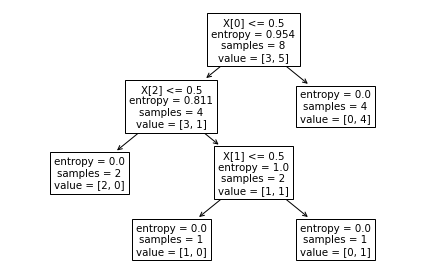

In [4]:
tree.plot_tree(model)
plt.tight_layout()

# Q3.1 Make a decision tree by hand
![Alt text](./Q3.1_Table.png)

# Q3.1 Calculations
![Alt text](./Q3.1.1_Table.png)

P(Y=1) = 3/6\
P(Y=0)= 3/6

Root Entropy: H(Y) = -P(Y=1) log (P(Y=1)) -P(Y=0) log (P(Y=0))\
		        = -3/6 log(3/6) -  3/6 log(3/6)\
		        = -3/6 * (-1) - 3/6 * (-1)\
		        = 1
                
—---------------—---------------—---------------—-

P(Y=1 | Color=1) = 1/1\
P(Y=1 | Color=0) = 2/5

H(Y | Color=1) = -P(Y=1 | Color=1) log (P(Y=1 | Color=1)) -P(Y=0 | Color=1) log (P(Y=0 | Color=1))\
               = -1 log (1) - 0 log (0)\
               = -1 * 0 - 0\
               = 0

H(Y | Color=0) = -P(Y=1 | Color=0) log (P(Y=1 | Color=0)) -P(Y=0 | Color=0) log (P(Y=0 | Color=0))\
              = -⅖   log (⅖  ) - ⅗   log (⅗)\
              = -⅖  * (-1.322) - ⅗  * (-0.737)\
              = 0.971

IG(Y | Color) = H(Y) - P(Color=1) H(Y | Color=1)  - P(Color=0) H(Y | Color=0)\
	   = 1 - 1/6 * 0 - 5/6 * 0.971\
	   = 0.1908333
       
—---------------—---------------—---------------—-


P(Y=1 | Length=1) = 2/3\
P(Y=1 | Length=0) = 1/3

H(Y | Length=1) = -P(Y=1 | Length=1) log (P(Y=1 | Length=1)) -P(Y=0 | Length=1) log (P(Y=0 | Length=1))\
              = -⅔  log (⅔ ) -⅓  log (⅓ )\
              = -⅔  * -0.585 - ⅓ *(-1.585)\
              = 0.91833333

H(Y | Length=0) = -P(Y=1 | Length=0) log (P(Y=1 | Length=0)) -P(Y=0 | Length=0) log (P(Y=0 | Length=0))\
              = -⅓  log (⅓ ) - ⅔ log (⅔ )\
              = -⅓  * (-1.585) - ⅔   * (-0.585)\
              = 0.91833333

IG(Y | Length) = H(Y) - P(Length=1) H(Y | Length=1)  - P(Length=0) H(Y | Length=0)\
               = 1 - 3/6 * 0.91833333 - 3/6 * 0.91833333\
               = 0.08166667
               
—---------------—---------------—---------------—-

P(Y=1 | Size=1) = 1/2\
P(Y=1 | Size=0) = 2/4

H(Y | Size=1) = -P(Y=1 | Size=1) log (P(Y=1 | Size=1)) -P(Y=0 | Size=1) log (P(Y=0 | Size=1))\
              = -½  log (½ ) - ½   log (½ )\
              = -½  * (-1) - ½  * (-1)\
              = 1

H(Y | Size=0) = -P(Y=1 | Size=0) log (P(Y=1 | Size=0)) -P(Y=0 | Size=0) log (P(Y=0 | Size=0))\
              = -½  log (½ ) - ½   log (½ )\
              = -½  * (-1) - ½  * (-1)\
              = 1

IG(Y | Size) = H(Y) - P(Size=1) H(Y | Size=1)  - P(Size=0) H(Y | Size=0)\
           = 1 - 2/6 * 1 - 4/6 * 1\
           = 0
           
—---------------—---------------—---------------—-

P(Y=1 | Brightness=1) = 1/1\
P(Y=1 | Brightness=0) = 2/5

H(Y | Brightness=1) = -P(Y=1 | Brightness=1) log (P(Y=1 | Brightness=1)) -P(Y=0 | Brightness=1) log (P(Y=0 | Brightness=1))\
	      = -1  log (1 ) - 0   log (0 )\
          = 0

H(Y | Brightness=0) = -P(Y=1 | Brightness=0) log (P(Y=1 | Brightness=0)) -P(Y=0 | Brightness=0) log (P(Y=0 | Brightness=0))\
	      = -⅖  log (⅖  ) - ⅗   log (⅗ )\
          = -⅖   * (-1.322) - ⅗   * (-0.737)\
          = 0.971


IG(Y | Brightness) = H(Y) - P(Brightness=1) H(Y | Brightness=1)  - P(Brightness=0) H(Y | Brightness=0)\
	   = 1 - 1/6 * 0 - 5/6 * 0.971\
	   = 0.1908333
       
—---------------—---------------—---------------—-

P(Y=1 | Shape=1) = 2/2\
P(Y=1 | Shape=0) = 1/4

H(Y | Shape=1) = -P(Y=1 | Shape=1) log (P(Y=1 | Shape=1)) -P(Y=0 | Shape=1) log (P(Y=0 | Shape=1))\
	      = -1  log (1 ) - 0   log (0 )\
          = 0

H(Y | Shape=0) = -P(Y=1 | Shape=0) log (P(Y=1 | Shape=0)) -P(Y=0 | Shape=0) log (P(Y=0 | Shape=0))\
	      = -¼   log (¼ ) - ¾  log (¾  )\
          = -¼   * (-2) - ¾   * (-0.415)\
          = 0.81125

IG(Y | Shape) = H(Y) - P(Shape=1) H(Y | Shape=1)  - P(Shape=0) H(Y | Shape=0)\
           = 1 - 2/6 * 0 - 4/6 * 0.81125\
           = 0.45916667

—-------------Pick Shape as first branch as higher IG-----------

P(Y=1) = 1/4\
P(Y=0)= 3/4

Root Entropy 2 : H(Y) = -P(Y=1) log (P(Y=1)) -P(Y=0) log (P(Y=0))\
                      = -¼  log (¼ ) - ¾  log (¾)\
                      = -¼ * (-2) - ¾ * (-0.415)\
                      = 0.81125
                      
—---------------—---------------—---------------—-

P(Y=1 | Color=1) = 1/1\
P(Y=1 | Color=0) = 0

H(Y | Color=1) = -P(Y=1 | Color=1) log (P(Y=1 | Color=1)) -P(Y=0 | Color=1) log (P(Y=0 | Color=1))\
	      = -1 log (1) - 0 log (0)\
          = -1 * 0 - 0\
          = 0

H(Y | Color=0) = -P(Y=1 | Color=0) log (P(Y=1 | Color=0)) -P(Y=0 | Color=0) log (P(Y=0 | Color=0))\
              = 0 - 1 log(1)\
              = 0 - 0\
              = 0

IG(Y | Color) = H(Y) - P(Color=1) H(Y | Color=1)  - P(Color=0) H(Y | Color=0)\
	   = 0.81125 - 0 - 0\
	   = 0.81125
       
—---------------—---------------—---------------—-


P(Y=1 | Length=1) = 1/2\
P(Y=1 | Length=0) = 0

H(Y | Length=1) = -P(Y=1 | Length=1) log (P(Y=1 | Length=1)) -P(Y=0 | Length=1) log (P(Y=0 | Length=1))\
                = -½   log (½) -½  log (½ )\
                = 1

H(Y | Length=0) = -P(Y=1 | Length=0) log (P(Y=1 | Length=0)) -P(Y=0 | Length=0) log (P(Y=0 | Length=0))\
              = 0

IG(Y | Length) = H(Y) - P(Length=1) H(Y | Length=1)  - P(Length=0) H(Y | Length=0)\
	   = 0.81125 - 2/4 - 0\
	   = 0.31125
       
—---------------—---------------—---------------—-

P(Y=1 | Size=1) = 0\
P(Y=1 | Size=0) = 1/3

H(Y | Size=1) = -P(Y=1 | Size=1) log (P(Y=1 | Size=1)) -P(Y=0 | Size=1) log (P(Y=0 | Size=1))\
              = -0 - 1/1   log (1/1)\
              = 0

H(Y | Size=0) = -P(Y=1 | Size=0) log (P(Y=1 | Size=0)) -P(Y=0 | Size=0) log (P(Y=0 | Size=0))\
              = -⅓   log (⅓  ) - ⅔    log (⅔  )\
              = -⅓   * (-1.585) - ⅔   * (-0.585)\
          = 0.9183333

IG(Y | Size) = H(Y) - P(Size=1) H(Y | Size=1)  - P(Size=0) H(Y | Size=0)\
	   = 0.81125 - 1/4 * 0.9183333  - 0\
	   = 0.58166668
       
—---------------—---------------—---------------—-

P(Y=1 | Brightness=1) = 0\
P(Y=1 | Brightness=0) = 1/4

H(Y | Brightness=1) = -P(Y=1 | Brightness=1) log (P(Y=1 | Brightness=1)) -P(Y=0 | Brightness=1) log (P(Y=0 | Brightness=1))\
	      = 0

H(Y | Brightness=0) = -P(Y=1 | Brightness=0) log (P(Y=1 | Brightness=0)) -P(Y=0 | Brightness=0) log (P(Y=0 | Brightness=0))\
	      = -¼   log (¼ ) - ¾  log (¾  )\
          = -¼   * (-2) - ¾   * (-0.415)\
          = 0.81125


IG(Y | Brightness) = H(Y) - P(Brightness=1) H(Y | Brightness=1)  - P(Brightness=0) H(Y | Brightness=0)\
	   = 0.81125 - 0 - 4/6 * 0.81125\
	   = 0.2704



# Q3.2 Code

In [5]:
#Q3
X = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 1],
    [0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0]
])

y = np.array([0, 1, 0, 1, 0, 1])

model = DecisionTreeClassifier(criterion='entropy', random_state=1024)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=1024)

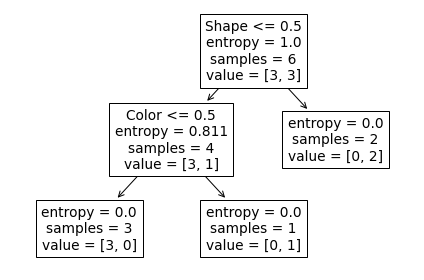

In [6]:
tree.plot_tree(model,feature_names=['Color','Length','Size','Brightness','Shape'])
plt.tight_layout()